# H&M Personalized Fashion Recommendations

Techniques and tools used: 

Kaggle competition link: https://www.kaggle.com/competitions/h-and-m-personalized-fashion-recommendations/overview

Refs
1. a
2. b
3. c

## EDA

1. [Articles](#articles)
2. [Customers](#customers)
3. [Transactions]()

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
articles = pd.read_csv("./data/h-and-m-personalized-fashion-recommendations/articles.csv")
customers = pd.read_csv("./data/h-and-m-personalized-fashion-recommendations/customers.csv")
transactions = pd.read_csv("./data/h-and-m-personalized-fashion-recommendations/transactions_train.csv")

### Articles

This table contains all h&m articles with details such as a type of product, a color, a product group and other features.
Article data description:

`article_id` : A unique identifier of every article.  
`product_code, prod_name` : A unique identifier of every product and its name (not the same).  
`product_type, product_type_name` : The group of product_code and its name.  
`graphical_appearance_no, graphical_appearance_name` : The group of graphics and its name.  
`colour_group_code, colour_group_name` : The group of color and its name.  
`perceived_colour_value_id, perceived_colour_value_name, perceived_colour_master_id, perceived_colour_master_name` : The added color info.  
`department_no, department_name` : A unique identifier of every dep and its name. 
`index_code, index_name` : A unique identifier of every index and its name.  
`index_group_no, index_group_name` : A group of indeces and its name.  
`section_no, section_name` : A unique identifier of every section and its name.   
`garment_group_no, garment_group_name` : A unique identifier of every garment and its name.  
`detail_desc` : Details. 

In [4]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [5]:
print('\n================ Value Counts ================\n')
print(articles['index_name'].value_counts())
print('\n================ Ratio ================\n')
print(articles['index_name'].value_counts() / len(articles))


================ Value Counts ================

index_name
Ladieswear                        26001
Divided                           15149
Menswear                          12553
Children Sizes 92-140             12007
Children Sizes 134-170             9214
Baby Sizes 50-98                   8875
Ladies Accessories                 6961
Lingeries/Tights                   6775
Children Accessories, Swimwear     4615
Sport                              3392
Name: count, dtype: int64

================ Ratio ================

index_name
Ladieswear                        0.246357
Divided                           0.143535
Menswear                          0.118938
Children Sizes 92-140             0.113765
Children Sizes 134-170            0.087302
Baby Sizes 50-98                  0.084090
Ladies Accessories                0.065955
Lingeries/Tights                  0.064192
Children Accessories, Swimwear    0.043727
Sport                             0.032139
Name: count, dtype: float64


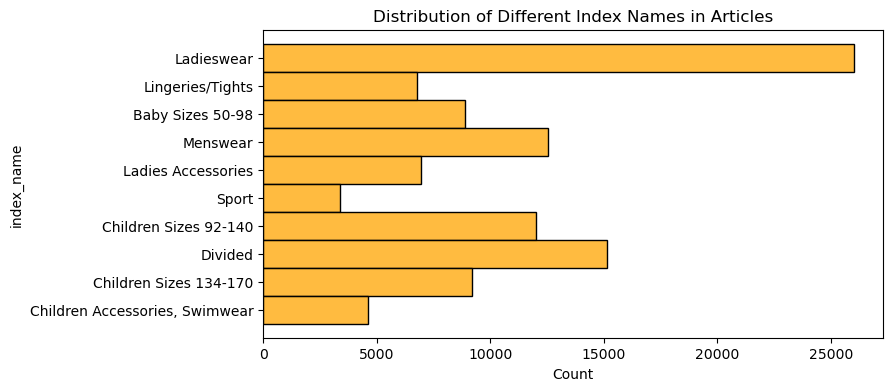

In [6]:
# Ladieswear accounts for a significant part of all dresses. Sportswear has the least portion.
plt.figure(figsize=(8, 4))
sns.histplot(data=articles, y='index_name', color='orange')
plt.xlabel('Count')
plt.ylabel('index_name')
plt.title('Distribution of Different Index Names in Articles')
plt.show()

In [7]:
print('\n================ Value Counts ================\n')
print(articles['garment_group_name'].value_counts())
print('\n================ Ratio ================\n')
print(articles['garment_group_name'].value_counts() / len(articles))


================ Value Counts ================

garment_group_name
Jersey Fancy                     21445
Accessories                      11519
Jersey Basic                      8126
Knitwear                          7490
Under-, Nightwear                 7441
Trousers                          6727
Blouses                           5838
Shoes                             5145
Dresses Ladies                    4874
Outdoor                           4501
Unknown                           3873
Trousers Denim                    3100
Swimwear                          2787
Socks and Tights                  2272
Shirts                            2116
Woven/Jersey/Knitted mix Baby     1965
Shorts                            1559
Dresses/Skirts girls              1541
Skirts                            1254
Special Offers                    1061
Dressed                            908
Name: count, dtype: int64

================ Ratio ================

garment_group_name
Jersey Fancy              

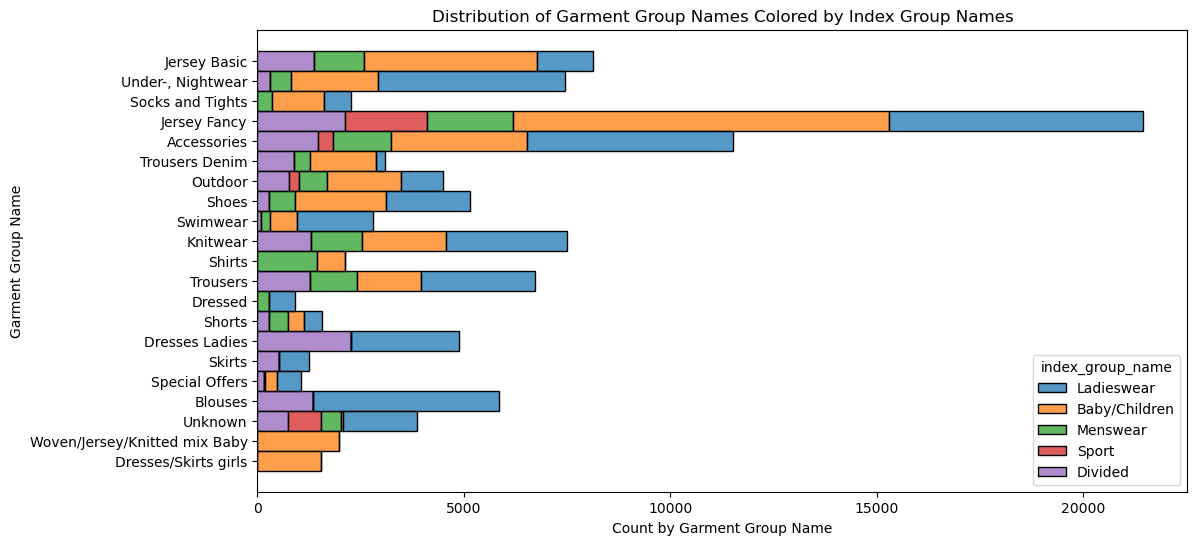

In [8]:
# The garments grouped by index: Jersey fancy is the most frequent garment, especially for women and children. 
# The next by number is accessories, many various accessories with low price.
plt.figure(figsize=(12, 6))
sns.histplot(data=articles, y='garment_group_name', hue='index_group_name', multiple='stack')
plt.xlabel('Count by Garment Group Name')
plt.ylabel('Garment Group Name')
plt.title('Distribution of Garment Group Names Colored by Index Group Names')
plt.show()

In [9]:
# Pay attention to index group-index structure. Ladieswear and Children/Baby have subgroups.
articles.groupby(['index_group_name', 'index_name']).count()['article_id']

index_group_name  index_name                    
Baby/Children     Baby Sizes 50-98                   8875
                  Children Accessories, Swimwear     4615
                  Children Sizes 134-170             9214
                  Children Sizes 92-140             12007
Divided           Divided                           15149
Ladieswear        Ladies Accessories                 6961
                  Ladieswear                        26001
                  Lingeries/Tights                   6775
Menswear          Menswear                          12553
Sport             Sport                              3392
Name: article_id, dtype: int64

In [25]:
# Look at the product group-product structure. 
# Accessories are really various, the most numerious: bags, earrings and hats. However, trousers prevail.
# pd.options.display.max_rows = None
articles.groupby(['product_group_name', 'product_type_name']).count()['article_id']

product_group_name     product_type_name       
Accessories            Accessories set                 7
                       Alice band                      6
                       Baby Bib                        3
                       Bag                          1280
                       Beanie                         56
                       Belt                          458
                       Bracelet                      180
                       Braces                          3
                       Bucket hat                      7
                       Cap                            13
                       Cap/peaked                    573
                       Dog Wear                       20
                       Earring                      1159
                       Earrings                       11
                       Eyeglasses                      2
                       Felt hat                       10
                       Giftbox          

In [ ]:
# The table with number of unique values in columns:
for col in articles.columns:
    if not 'no' in col and not 'code' in col and not 'id' in col:
        print(f'# of unique {col}: {articles[col].nunique()}')

# of unique prod_name: 45875
# of unique product_type_name: 131
# of unique product_group_name: 19
# of unique graphical_appearance_name: 30
# of unique colour_group_name: 50
# of unique perceived_colour_value_name: 8
# of unique perceived_colour_master_name: 20
# of unique department_name: 250
# of unique index_name: 10
# of unique index_group_name: 5
# of unique section_name: 56
# of unique garment_group_name: 21
# of unique detail_desc: 43404


### Customers

Customers data description:

`customer_id` : A unique identifier of every customer  
`FN` : 1 or missed  
`Active` : 1 or missed  
`club_member_status` : Status in club  
`fashion_news_frequency` : How often H&M may send news to customer  
`age` : The current age  
`postal_code` : Postal code of customer  

In [27]:
# pd.options.display.max_rows = 50
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [29]:
# There are no duplicates in `customers`
print(f'duplicates in customers: {len(customers) - customers["customer_id"].nunique()}')

duplicates in customers: 0


In [33]:
# Here we have abnormal number of customers by one postal code. One has 120303, 
# it might be encoded null adress or smth like a huge distribution center, or pickup.
data_postal = customers.groupby('postal_code', as_index=False).count().sort_values('customer_id', ascending=False)
data_postal.head()

,postal_code,customer_id,FN,Active,club_member_status,fashion_news_frequency,age
61034,2c29ae653a9282cce4151bd87643c907644e09541abc28...,120303,42874,39886,118281,114377,118002
281937,cc4ed85e30f4977dae47662ddc468cd2eec11472de6fac...,261,109,104,261,261,260
156090,714976379549eb90aae4a71bca6c7402cc646ae7c40f6c...,159,90,88,159,159,158
171208,7c1fa3b0ec1d37ce2c3f34f63bd792f3b4494f324b6be5...,157,55,54,157,156,156
126228,5b7eb31eabebd3277de632b82267286d847fd5d44287ee...,156,42,41,156,156,155
